In [98]:
import torch
torch.cuda.empty_cache() 

In [99]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [100]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [101]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [102]:
import pandas as pd
from PIL import Image as ima
import warnings

In [103]:
from mt_function_yl import *

In [104]:
df = pd.read_csv('/home/yelhe/script/mt/input/df_all_new1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               3934 non-null   int64  
 1   gmedian            3934 non-null   float64
 2   rmedian            3934 non-null   float64
 3   bmedian            3934 non-null   float64
 4   gmean              3934 non-null   float64
 5   rmean              3934 non-null   float64
 6   bmean              3934 non-null   float64
 7   gstd               3934 non-null   float64
 8   rstd               3934 non-null   float64
 9   bstd               3934 non-null   float64
 10  gq25               3934 non-null   float64
 11  gq75               3934 non-null   float64
 12  rq25               3934 non-null   float64
 13  rq75               3934 non-null   float64
 14  bq25               3934 non-null   float64
 15  bq75               3934 non-null   float64
 16  cdmean             3934 

In [105]:
df = df.replace({True:1, False:0})

### Library Preparation 

In [106]:
# Importing Modules

from sklearn import * 
from sklearn import datasets
from sklearn.datasets import load_digits

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn

In [107]:
# Select only the bottom half of the images using threshold for topm
# Topm < 300
df_l = df.loc[df['topm'] >= 300]

In [108]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 1 to 3932
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               2160 non-null   int64  
 1   gmedian            2160 non-null   float64
 2   rmedian            2160 non-null   float64
 3   bmedian            2160 non-null   float64
 4   gmean              2160 non-null   float64
 5   rmean              2160 non-null   float64
 6   bmean              2160 non-null   float64
 7   gstd               2160 non-null   float64
 8   rstd               2160 non-null   float64
 9   bstd               2160 non-null   float64
 10  gq25               2160 non-null   float64
 11  gq75               2160 non-null   float64
 12  rq25               2160 non-null   float64
 13  rq75               2160 non-null   float64
 14  bq25               2160 non-null   float64
 15  bq75               2160 non-null   float64
 16  cdmean             2160 non-n

In [109]:
df_l.describe()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,leftm,rightm,topm,bottomm,Nr
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03
mean,29.504167,101.491898,91.419907,104.593287,103.164468,93.346835,106.074614,30.609810,30.185899,31.094619,...,55.425575,6.221766,269.460631,0.986111,0.970370,275.307407,364.743981,366.888426,421.297222,9.990005e+14
std,18.870196,54.958958,52.067565,59.101944,50.497141,48.062135,54.528827,16.290779,16.165381,16.067920,...,82.346013,17.251650,395.421201,0.151545,0.239754,200.943585,201.579630,71.324705,97.855394,5.870120e+07
min,1.000000,1.000000,4.000000,2.000000,2.936775,5.470320,5.073171,2.878821,3.148867,3.459970,...,3.385138,1.009687,14.828427,-1.000000,-1.000000,0.000000,9.000000,300.000000,310.000000,9.990005e+14
25%,15.000000,59.000000,47.500000,57.000000,64.278208,54.752609,61.834179,18.014118,17.833800,18.684179,...,18.485281,1.659351,75.698484,1.000000,1.000000,81.750000,193.000000,321.000000,348.000000,9.990005e+14
50%,27.000000,95.750000,88.000000,95.000000,99.669260,92.245829,99.928106,28.196499,27.346721,28.928715,...,29.456962,2.678092,128.740114,1.000000,1.000000,274.000000,365.000000,342.000000,384.000000,9.990006e+14
75%,40.000000,140.625000,127.000000,145.625000,138.364375,126.581584,142.832389,39.691307,38.858509,40.078818,...,49.554005,4.913729,252.219299,1.000000,1.000000,453.000000,556.500000,387.000000,464.000000,9.990006e+14
max,106.000000,249.000000,252.000000,245.000000,244.270833,243.297883,241.957633,98.309030,98.262223,98.221301,...,498.977127,487.911969,2572.118959,1.000000,1.000000,630.000000,639.000000,625.000000,639.000000,9.990006e+14


In [110]:
df_l.loc[(df_l.label_group == 'means_of_transportation'), 'label_group'] = 'other'

In [111]:
df_l.loc[(df_l.label_group == 'building'), 'label_group'] = 'other'

In [112]:
# df_ = df_new.drop(['area', 'ed', 'perimeter'], axis=1)
le = LabelEncoder()
df_l['labelgroup_index'] = le.fit_transform(df_l['label_group'])
y = df_l['label_group']
y = le.transform(y)

/sctmp/yelhe/ipykernel_185536/1287439127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['labelgroup_index'] = le.fit_transform(df_l['label_group'])


In [113]:
# df.head()

In [114]:
df2= df_l
df2.groupby(['label_group','labelgroup_index']).size().reset_index().rename(columns={0:'count'})

,label_group,labelgroup_index,count
0,curb,0,49
1,infrastructure,1,535
2,other,2,1355
3,vegetation,3,221


In [115]:
# 0 building; 1 curb; 2 infrastructure;
# 3 other; 4 sky; 5 vegetation

# Updated for lower part
# 0 building; 1 curb; 2 infrastructure;
# 3 other; 4 vegetation

# 0 curb; 1 infrastructure;
# 2 other; 3 vegetation


In [116]:
dfc = df_l
# Drop info columns
dfc = dfc.drop(['label', 'Nr', 'label_group', 'mask', 'labelgroup_index'], axis = 1)
# Drop variables which don't help much
dfc = dfc.drop(['isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm', 'topm'], axis = 1)

In [117]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 1 to 3932
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            2160 non-null   float64
 1   rmedian            2160 non-null   float64
 2   bmedian            2160 non-null   float64
 3   gmean              2160 non-null   float64
 4   rmean              2160 non-null   float64
 5   bmean              2160 non-null   float64
 6   gstd               2160 non-null   float64
 7   rstd               2160 non-null   float64
 8   bstd               2160 non-null   float64
 9   gq25               2160 non-null   float64
 10  gq75               2160 non-null   float64
 11  rq25               2160 non-null   float64
 12  rq75               2160 non-null   float64
 13  bq25               2160 non-null   float64
 14  bq75               2160 non-null   float64
 15  cdmean             2160 non-null   float64
 16  cdstd              2160 non-n

## Unsupervised

### Kmeans

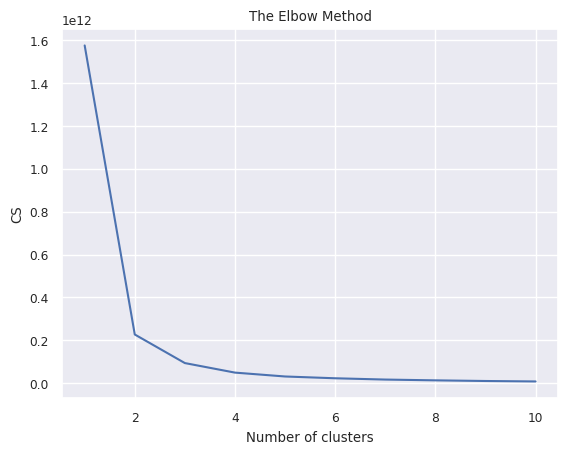

In [118]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfc)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [119]:
kmeans = KMeans(n_clusters = 4,random_state=0, n_init="auto")
kmeans.fit(dfc)
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 97 out of 2160 samples were correctly labeled.
Accuracy score: 0.04


In [120]:
column_names = list(dfc.columns)
print(column_names)

['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm']


### Hierachical clustering

In [121]:
#Ward, complete, average, and single linkage
hierarchical_cluster1 = AgglomerativeClustering(linkage='ward', n_clusters=6)
labels_hc = hierarchical_cluster1.fit_predict(dfc)
print(labels_hc)
hierarchical_cluster2 = AgglomerativeClustering(linkage='complete', n_clusters=6)
labels_hc2 = hierarchical_cluster2.fit_predict(dfc)
print(labels_hc2)
# Single linkage doesn't work well 
hierarchical_cluster3 = AgglomerativeClustering(linkage='single', n_clusters=6)
labels_hc3 = hierarchical_cluster3.fit_predict(dfc)
print(labels_hc3)
hierarchical_cluster4 = AgglomerativeClustering(linkage='average', n_clusters=6)
labels_hc4 = hierarchical_cluster4.fit_predict(dfc)
print(labels_hc4)

[5 3 1 ... 1 1 1]
[5 3 3 ... 3 3 3]
[0 0 0 ... 0 0 0]
[4 3 3 ... 3 3 3]


In [122]:
correct_labels1 = sum(y == labels_hc)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels1, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels1/float(y.size)))
correct_labels2 = sum(y == labels_hc2)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels2, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels2/float(y.size)))
correct_labels3 = sum(y == labels_hc3)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels3, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))
correct_labels4 = sum(y == labels_hc4)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels4, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels4/float(y.size)))

Result: 379 out of 2160 samples were correctly labeled.
Accuracy score: 0.18
Result: 241 out of 2160 samples were correctly labeled.
Accuracy score: 0.11
Result: 64 out of 2160 samples were correctly labeled.
Accuracy score: 0.03
Result: 246 out of 2160 samples were correctly labeled.
Accuracy score: 0.11


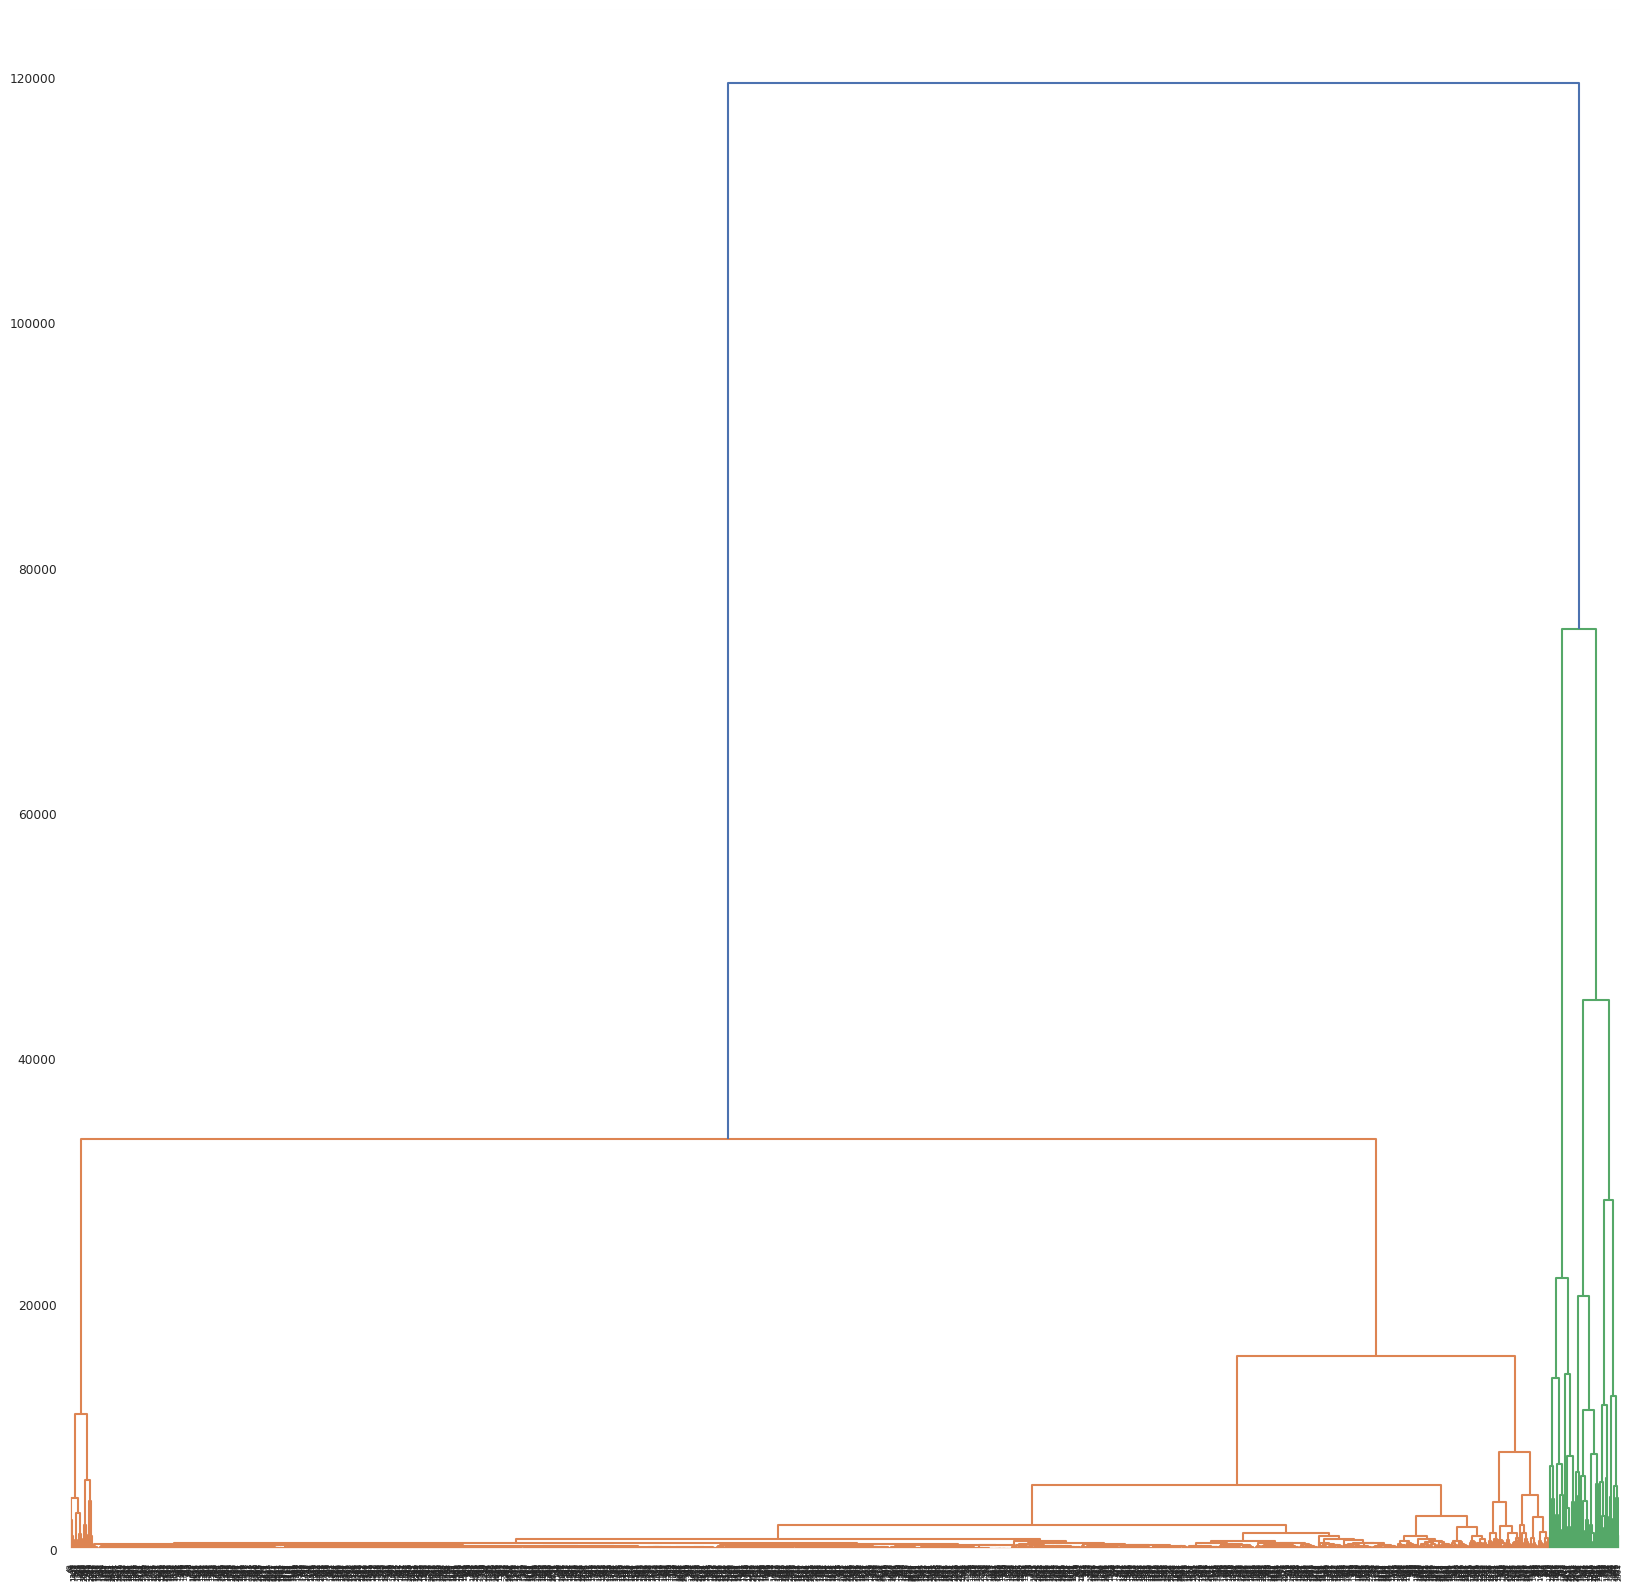

In [123]:
plt.figure(figsize=(20,20))
linkage_data = linkage(dfc, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### DBSCAN

In [124]:
cluster_db = DBSCAN(eps = 5, min_samples = 2)
labels_db = cluster_db.fit_predict(dfc)
print(labels_db)
correct_labels_db = sum(y == labels_db)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_db, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels_db/float(y.size)))

[-1 -1 -1 ... -1 -1 -1]
Result: 4 out of 2160 samples were correctly labeled.
Accuracy score: 0.00


### HDBSCAN

In [125]:
cluster_hdb = HDBSCAN(min_cluster_size = 2)
labels_hdb = cluster_hdb.fit_predict(dfc)
print(labels_hdb)
correct_labels_hdb = sum(y == labels_hdb)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_hdb, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels_hdb/float(y.size)))


[ 24  61  -1 ...  -1  -1 367]
Result: 2 out of 2160 samples were correctly labeled.
Accuracy score: 0.00


## Supervised

### Decision tree

In [126]:
X = dfc
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [127]:
dtree1 = DecisionTreeClassifier()
dtree1 = dtree1.fit(X, y)

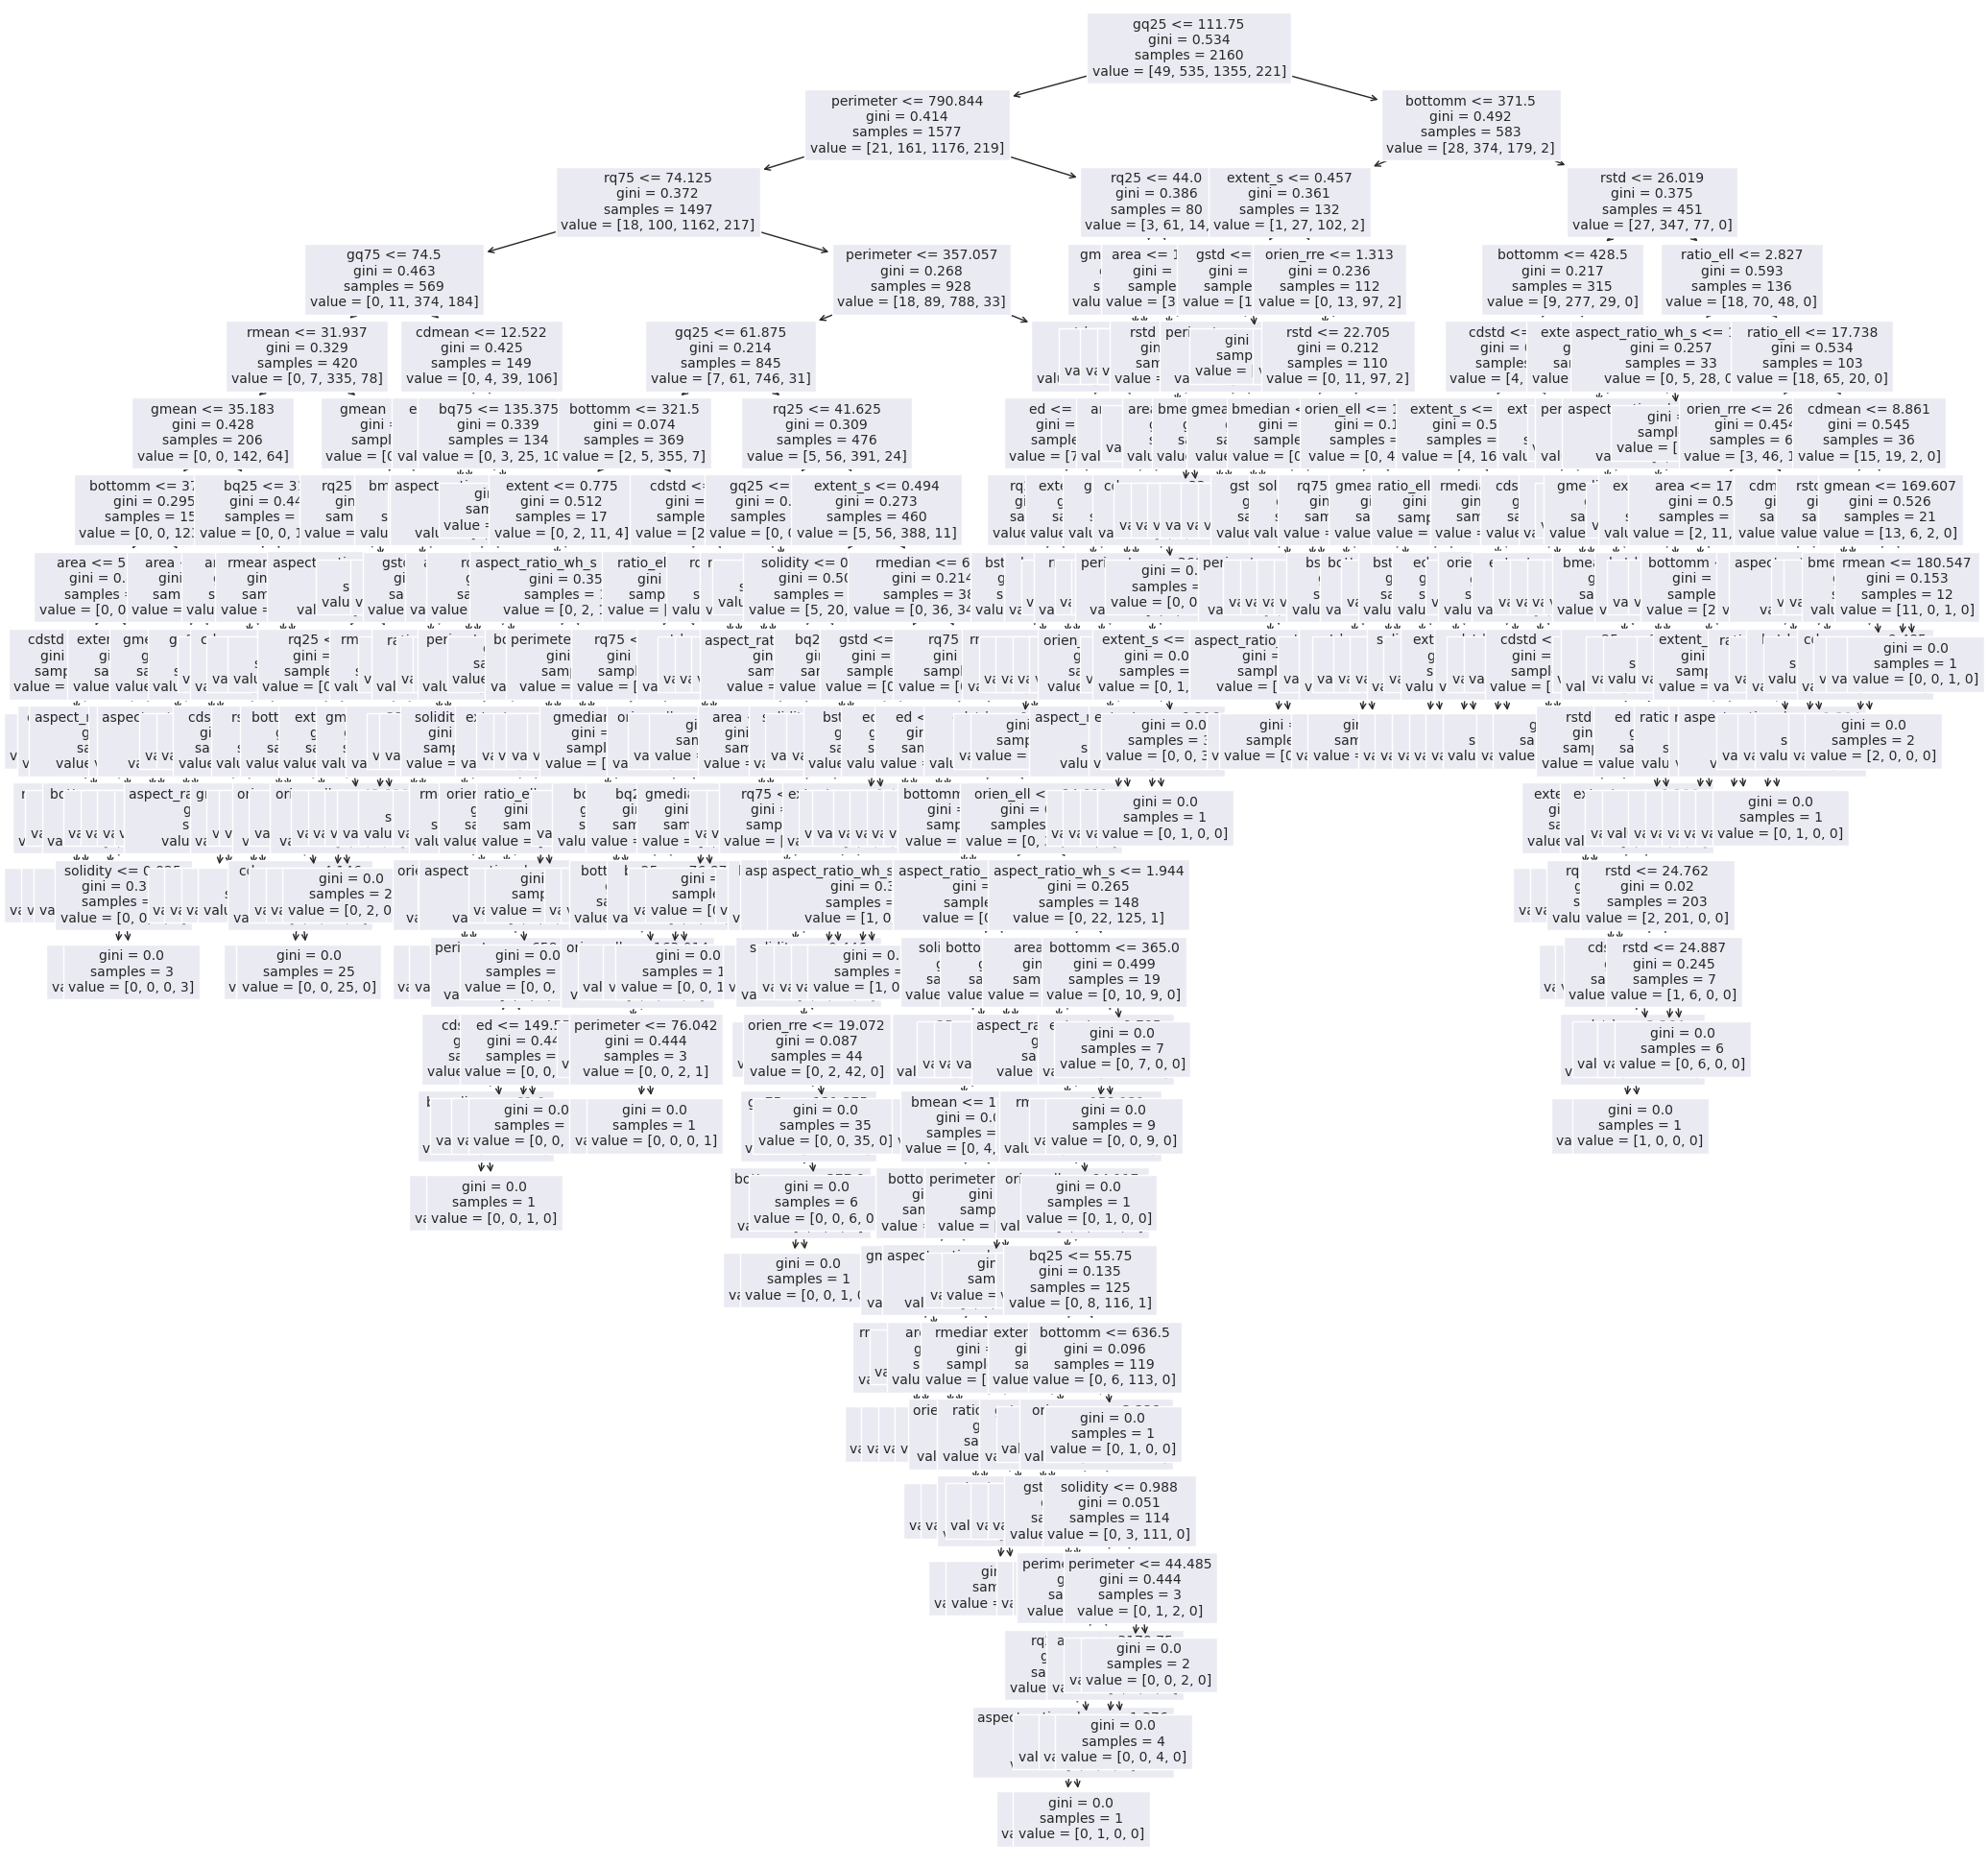

In [128]:
plt.figure(figsize=(25,25))
tree.plot_tree(dtree1, feature_names = column_names, fontsize=10)
plt.savefig('/home/yelhe/script/mt/output/' + 'decisiontree0_low_u' + '.jpg')
plt.show()

In [129]:
text_representation1 = tree.export_text(dtree1, feature_names = column_names)
print(text_representation1)

|--- gq25 <= 111.75
|   |--- perimeter <= 790.84
|   |   |--- rq75 <= 74.12
|   |   |   |--- gq75 <= 74.50
|   |   |   |   |--- rmean <= 31.94
|   |   |   |   |   |--- gmean <= 35.18
|   |   |   |   |   |   |--- bottomm <= 370.50
|   |   |   |   |   |   |   |--- area <= 542.25
|   |   |   |   |   |   |   |   |--- cdstd <= 1.05
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- cdstd >  1.05
|   |   |   |   |   |   |   |   |   |--- orien_ell <= 2.60
|   |   |   |   |   |   |   |   |   |   |--- rmean <= 25.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |   |--- rmean >  25.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- orien_ell >  2.60
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- area >  542.25
|   |   |   |   |   |   |   |   |--- extent_s <= 0.75
|   |   |   |   |   |   |   |   |   |--- aspect_ratio_wh <= 

In [130]:
dtree2 = DecisionTreeClassifier(random_state = 2)
dtree2.fit(X_train,y_train)

y_pred = dtree2.predict(X_test)
# print(y_pred)
# print(y_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree2.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.7870370370370371


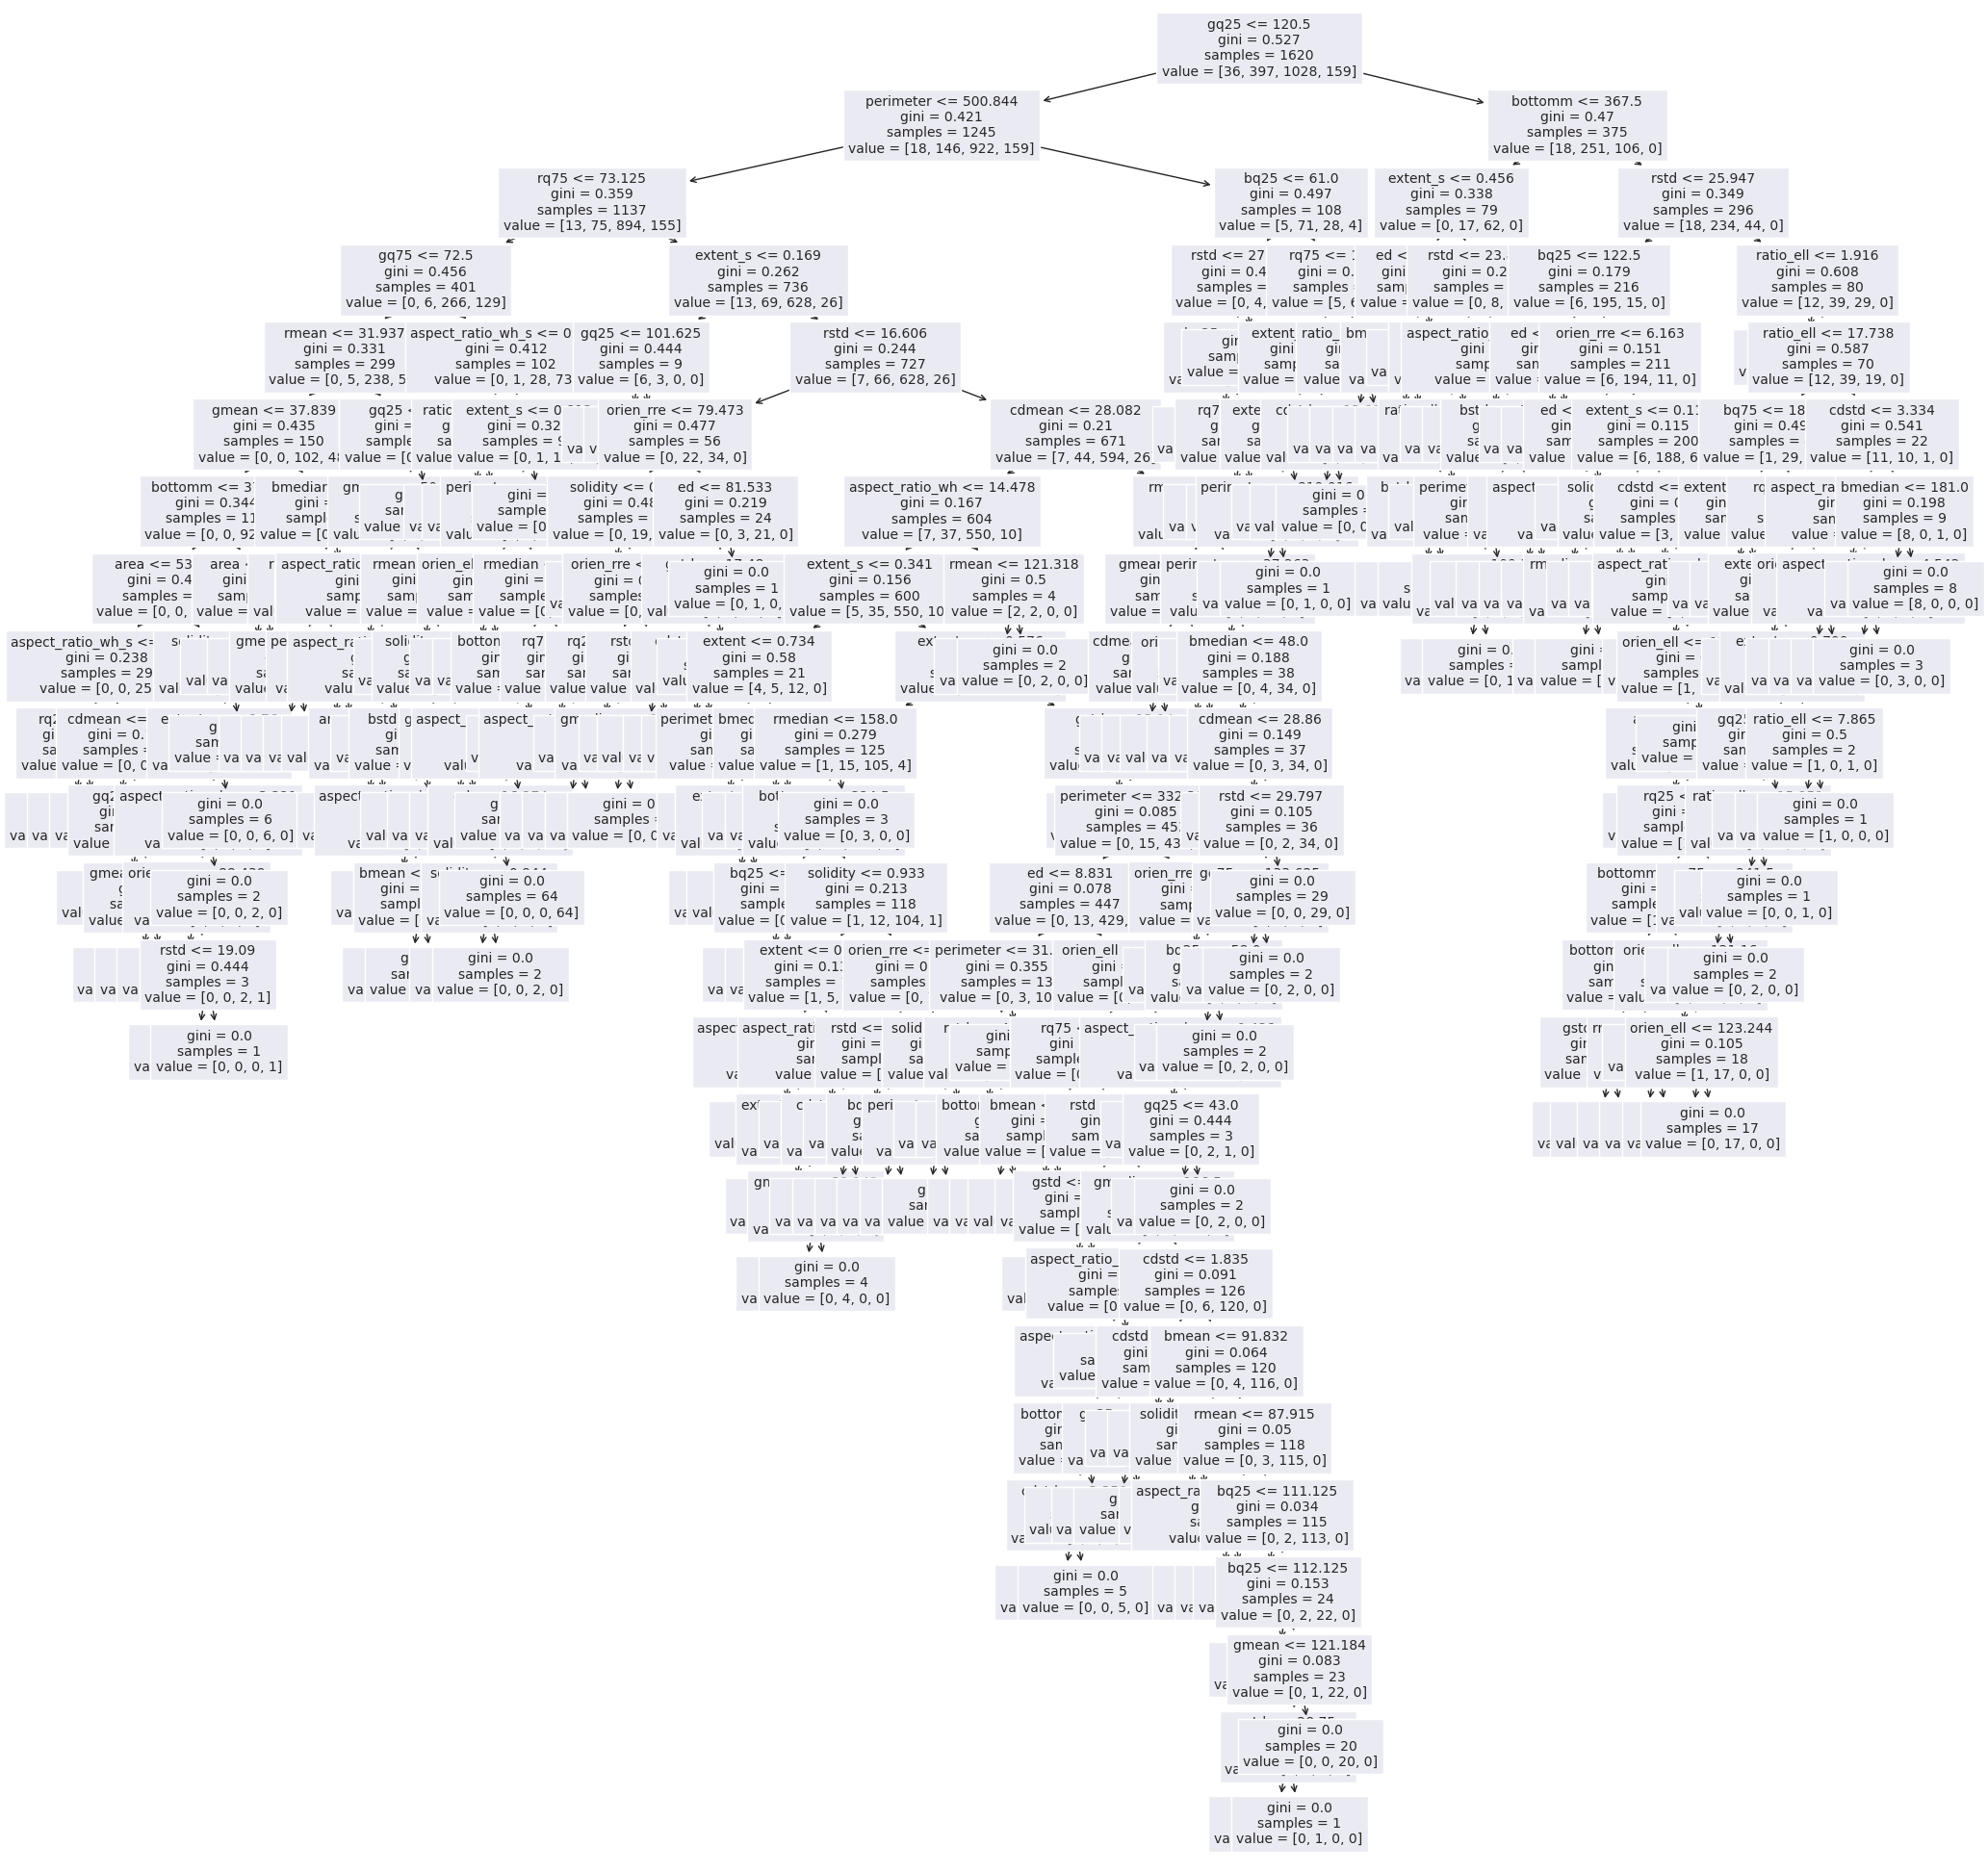

In [131]:
plt.figure(figsize=(25,25))
tree.plot_tree(dtree2, feature_names = column_names, fontsize=10)
plt.savefig('/home/yelhe/script/mt/output/' + 'decisiontree1_low_u' + '.jpg')
plt.show()

In [132]:
text_representation2 = tree.export_text(dtree2, feature_names = column_names)
print(text_representation2)

|--- gq25 <= 120.50
|   |--- perimeter <= 500.84
|   |   |--- rq75 <= 73.12
|   |   |   |--- gq75 <= 72.50
|   |   |   |   |--- rmean <= 31.94
|   |   |   |   |   |--- gmean <= 37.84
|   |   |   |   |   |   |--- bottomm <= 370.50
|   |   |   |   |   |   |   |--- area <= 539.25
|   |   |   |   |   |   |   |   |--- aspect_ratio_wh_s <= 0.42
|   |   |   |   |   |   |   |   |   |--- rq25 <= 9.25
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- rq25 >  9.25
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- aspect_ratio_wh_s >  0.42
|   |   |   |   |   |   |   |   |   |--- cdmean <= 2.49
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- cdmean >  2.49
|   |   |   |   |   |   |   |   |   |   |--- gq25 <= 22.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- gq25 >  22.50
|   |   |   |   |   |   |   |   |   | 

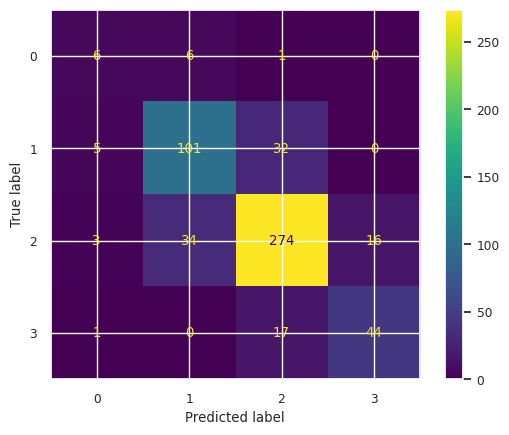

In [133]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

In [134]:
dtree1.classes_

array([0, 1, 2, 3])

In [135]:
print(f'class 0 accuracy: {confusion_matrix[0][0]/sum(confusion_matrix[0])}')
print(f'class 1 accuracy: {confusion_matrix[1][1]/sum(confusion_matrix[1])}')
print(f'class 2 accuracy: {confusion_matrix[2][2]/sum(confusion_matrix[2])}')
print(f'class 3 accuracy: {confusion_matrix[3][3]/sum(confusion_matrix[3])}')

class 0 accuracy: 0.46153846153846156
class 1 accuracy: 0.7318840579710145
class 2 accuracy: 0.8379204892966361
class 3 accuracy: 0.7096774193548387


### Linear Regression

In [136]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 3)

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train2)

y_pred_lr = reg.predict(X_test2)


print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test2, y_test2)))

# # plot for residual error
# # # plt.style.use('fivethirtyeight')
# # plotting residual errors in training data
# plt.scatter(reg.predict(X_train2),
# 			reg.predict(X_train2) - y_train2,
# 			color="green", s=10,
# 			label='Train data')
# # plotting residual errors in test data
# plt.scatter(reg.predict(X_test2),
# 			reg.predict(X_test2) - y_test2,
# 			color="blue", s=10,
# 			label='Test data')
# plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
# plt.legend(loc='upper right')
# plt.title("Residual errors")
# plt.show()
# plt.clf()
# plt.close()

Coefficients:  [-7.05512232e-03 -1.15810970e-03  6.42036834e-03  4.05582242e-02
 -2.62847902e-02 -1.96893278e-02  1.02479327e-02 -2.74158924e-03
  4.74093295e-03 -8.88703203e-03 -9.25831717e-03  1.01741801e-02
  8.61003370e-03  3.75760597e-03 -1.96629697e-03  3.61091492e-03
 -5.81485312e-03 -2.32671431e-06  6.92822550e-03  1.28909952e+00
 -3.99231564e-01 -1.82900090e-02 -9.84942980e-01 -2.11669665e-04
  2.71258982e-05  1.98017239e-03 -6.87661047e-04 -6.44528682e-04
 -6.73202368e-04]
Variance score: 0.5638044881062771


In [137]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg2=PolynomialFeatures(degree=2)
# X_poly = poly_reg2.fit_transform(X)
# lin_reg_2 = linear_model.LinearRegression()
# lin_reg_2.fit(X_poly,y)
# y_pred_lr2 = lin_reg_2.predict(X_test)

# poly_reg3 = PolynomialFeatures(degree=3)
# X_poly3=poly_reg3.fit_transform(X)
# lin_reg_3=linear_model.LinearRegression()
# lin_reg_3.fit(X_poly3,y)
# y_pred_lr3 = lin_reg_3.predict(X_test)

# # plot for residual error
# plt.style.use('fivethirtyeight')
# # plotting residual errors in training data
# plt.scatter(lin_reg_2.predict(X_train),
# 			lin_reg_2.predict(X_train) - y_train,
# 			color="green", s=10,
# 			label='Train data')
# # plotting residual errors in test data
# plt.scatter(lin_reg_2.predict(X_test),
# 			lin_reg_2.predict(X_test) - y_test,
# 			color="blue", s=10,
# 			label='Test data')
# plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
# plt.legend(loc='upper right')
# plt.title("Residual errors")
# plt.show()

### KNN

In [138]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 6)

neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(X_train1.values, y_train1)
y_pred_knn = neigh.predict(X_test1.values)

In [139]:
# print(y_pred_knn)
# print(y_test1)
print("Train data accuracy:",accuracy_score(y_true = y_train1, y_pred = neigh.predict(X_train1.values)))
print("Test data accuracy:",accuracy_score(y_true = y_test1, y_pred = y_pred_knn))

Train data accuracy: 0.8024691358024691
Test data accuracy: 0.7703703703703704


[[  2   7   3   0]
 [  0  97  36   0]
 [  0  32 297   9]
 [  0   1  36  20]]


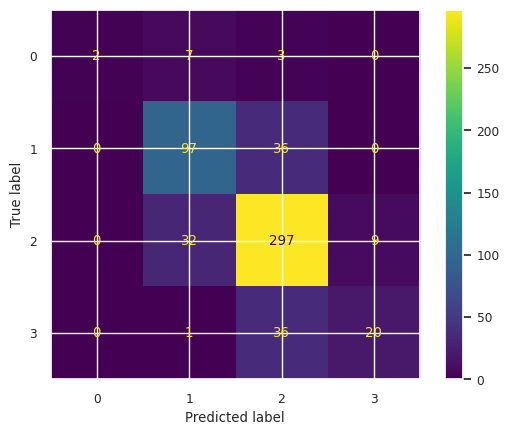

In [140]:
confusion_matrix_knn = metrics.confusion_matrix(y_test1, y_pred_knn)
print(confusion_matrix_knn)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn)
cm_display_knn.plot()

In [141]:
print(f'class 0 accuracy: {confusion_matrix_knn[0][0]/sum(confusion_matrix_knn[0])}')
print(f'class 1 accuracy: {confusion_matrix_knn[1][1]/sum(confusion_matrix_knn[1])}')
print(f'class 2 accuracy: {confusion_matrix_knn[2][2]/sum(confusion_matrix_knn[2])}')
print(f'class 3 accuracy: {confusion_matrix_knn[3][3]/sum(confusion_matrix_knn[3])}')
# print(f'class 4 accuracy: {confusion_matrix_knn[4][4]/sum(confusion_matrix_knn[4])}')

class 0 accuracy: 0.16666666666666666
class 1 accuracy: 0.7293233082706767
class 2 accuracy: 0.878698224852071
class 3 accuracy: 0.3508771929824561


### Random Forest

In [142]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 7)
X_train3.shape, X_test3.shape


((1620, 29), (540, 29))

In [143]:
rf = RandomForestClassifier(n_estimators = 4, random_state = 7)
rf.fit(X_train3, y_train3)
y_pred_rf = rf.predict(X_test3)

In [144]:
# print(y_pred_rf)
# print(y_test3)
print("Train data accuracy:",accuracy_score(y_true = y_train3, y_pred = rf.predict(X_train3)))
print("Test data accuracy:",accuracy_score(y_true = y_test3, y_pred = y_pred_rf))

Train data accuracy: 0.971604938271605
Test data accuracy: 0.825925925925926


[[  7   3   1   0]
 [  7 103  23   0]
 [  4  29 303   2]
 [  0   1  24  33]]


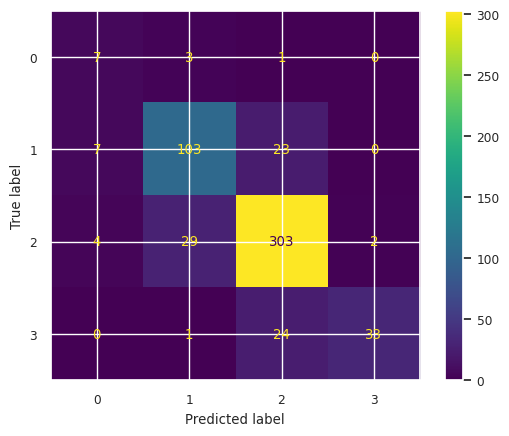

In [145]:
confusion_matrix_rf = metrics.confusion_matrix(y_test3, y_pred_rf)
print(confusion_matrix_rf)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
cm_display_rf.plot()

In [146]:
print(f'class 0 accuracy: {confusion_matrix_rf[0][0]/sum(confusion_matrix_rf[0])}')
print(f'class 1 accuracy: {confusion_matrix_rf[1][1]/sum(confusion_matrix_rf[1])}')
print(f'class 2 accuracy: {confusion_matrix_rf[2][2]/sum(confusion_matrix_rf[2])}')
print(f'class 3 accuracy: {confusion_matrix_rf[3][3]/sum(confusion_matrix_rf[3])}')
# print(f'class 4 accuracy: {confusion_matrix_rf[4][4]/sum(confusion_matrix_rf[4])}')

class 0 accuracy: 0.6363636363636364
class 1 accuracy: 0.7744360902255639
class 2 accuracy: 0.8964497041420119
class 3 accuracy: 0.5689655172413793


Text(0, 0.5, 'feature')

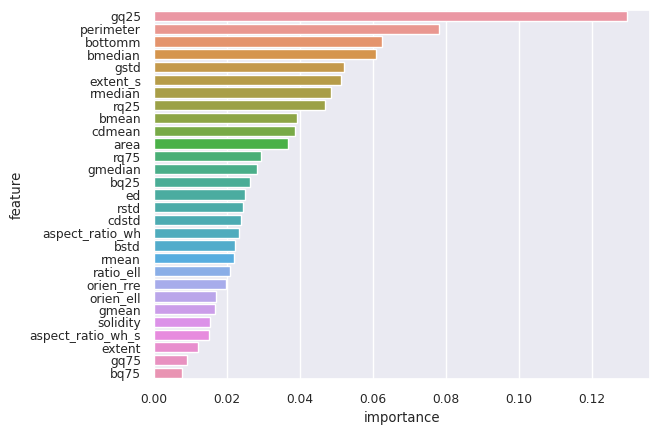

In [147]:
feature_name = list(dfc.columns.values.tolist())
importances = rf.feature_importances_
df_rf = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf['importances'], y = df_rf['features'])
plt.xlabel('importance')
plt.ylabel('feature')

### SVM

In [148]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 9)
X_train4.shape, X_test4.shape


((1512, 29), (648, 29))

In [149]:
svmm = svm.SVC(random_state = 9, decision_function_shape = 'ovo')
svmm.fit(X_train4, y_train4)
y_pred_svm = svmm.predict(X_test4)

In [150]:
# print(y_pred_svm)
# print(y_test4)
print(svmm.classes_)
print("Train data accuracy:",accuracy_score(y_true = y_train4, y_pred = svmm.predict(X_train4)))
print("Test data accuracy:",accuracy_score(y_true = y_test4, y_pred = y_pred_svm))
print("Precision:",metrics.precision_score(y_true = y_test4, y_pred = y_pred_svm, 
                                           average = 'micro'))
print("Recall:",metrics.recall_score(y_true = y_test4, y_pred = y_pred_svm,
                                    average = 'micro'))

[0 1 2 3]
Train data accuracy: 0.6812169312169312
Test data accuracy: 0.6867283950617284
Precision: 0.6867283950617284
Recall: 0.6867283950617284


[[  0   0  14   0]
 [  0  35 111   0]
 [  0  16 410   0]
 [  0   5  57   0]]


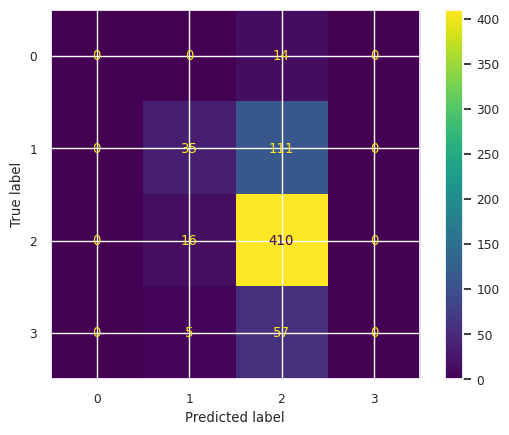

In [151]:
confusion_matrix_svm = metrics.confusion_matrix(y_test4, y_pred_svm)
print(confusion_matrix_svm)
cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm)
cm_display_svm.plot()

In [152]:
print(f'class 0 accuracy: {confusion_matrix_svm[0][0]/sum(confusion_matrix_svm[0])}')
print(f'class 1 accuracy: {confusion_matrix_svm[1][1]/sum(confusion_matrix_svm[1])}')
print(f'class 2 accuracy: {confusion_matrix_svm[2][2]/sum(confusion_matrix_svm[2])}')
print(f'class 3 accuracy: {confusion_matrix_svm[3][3]/sum(confusion_matrix_svm[3])}')
# print(f'class 4 accuracy: {confusion_matrix_svm[4][4]/sum(confusion_matrix_svm[4])}')

class 0 accuracy: 0.0
class 1 accuracy: 0.23972602739726026
class 2 accuracy: 0.9624413145539906
class 3 accuracy: 0.0


### Correlation Matrix

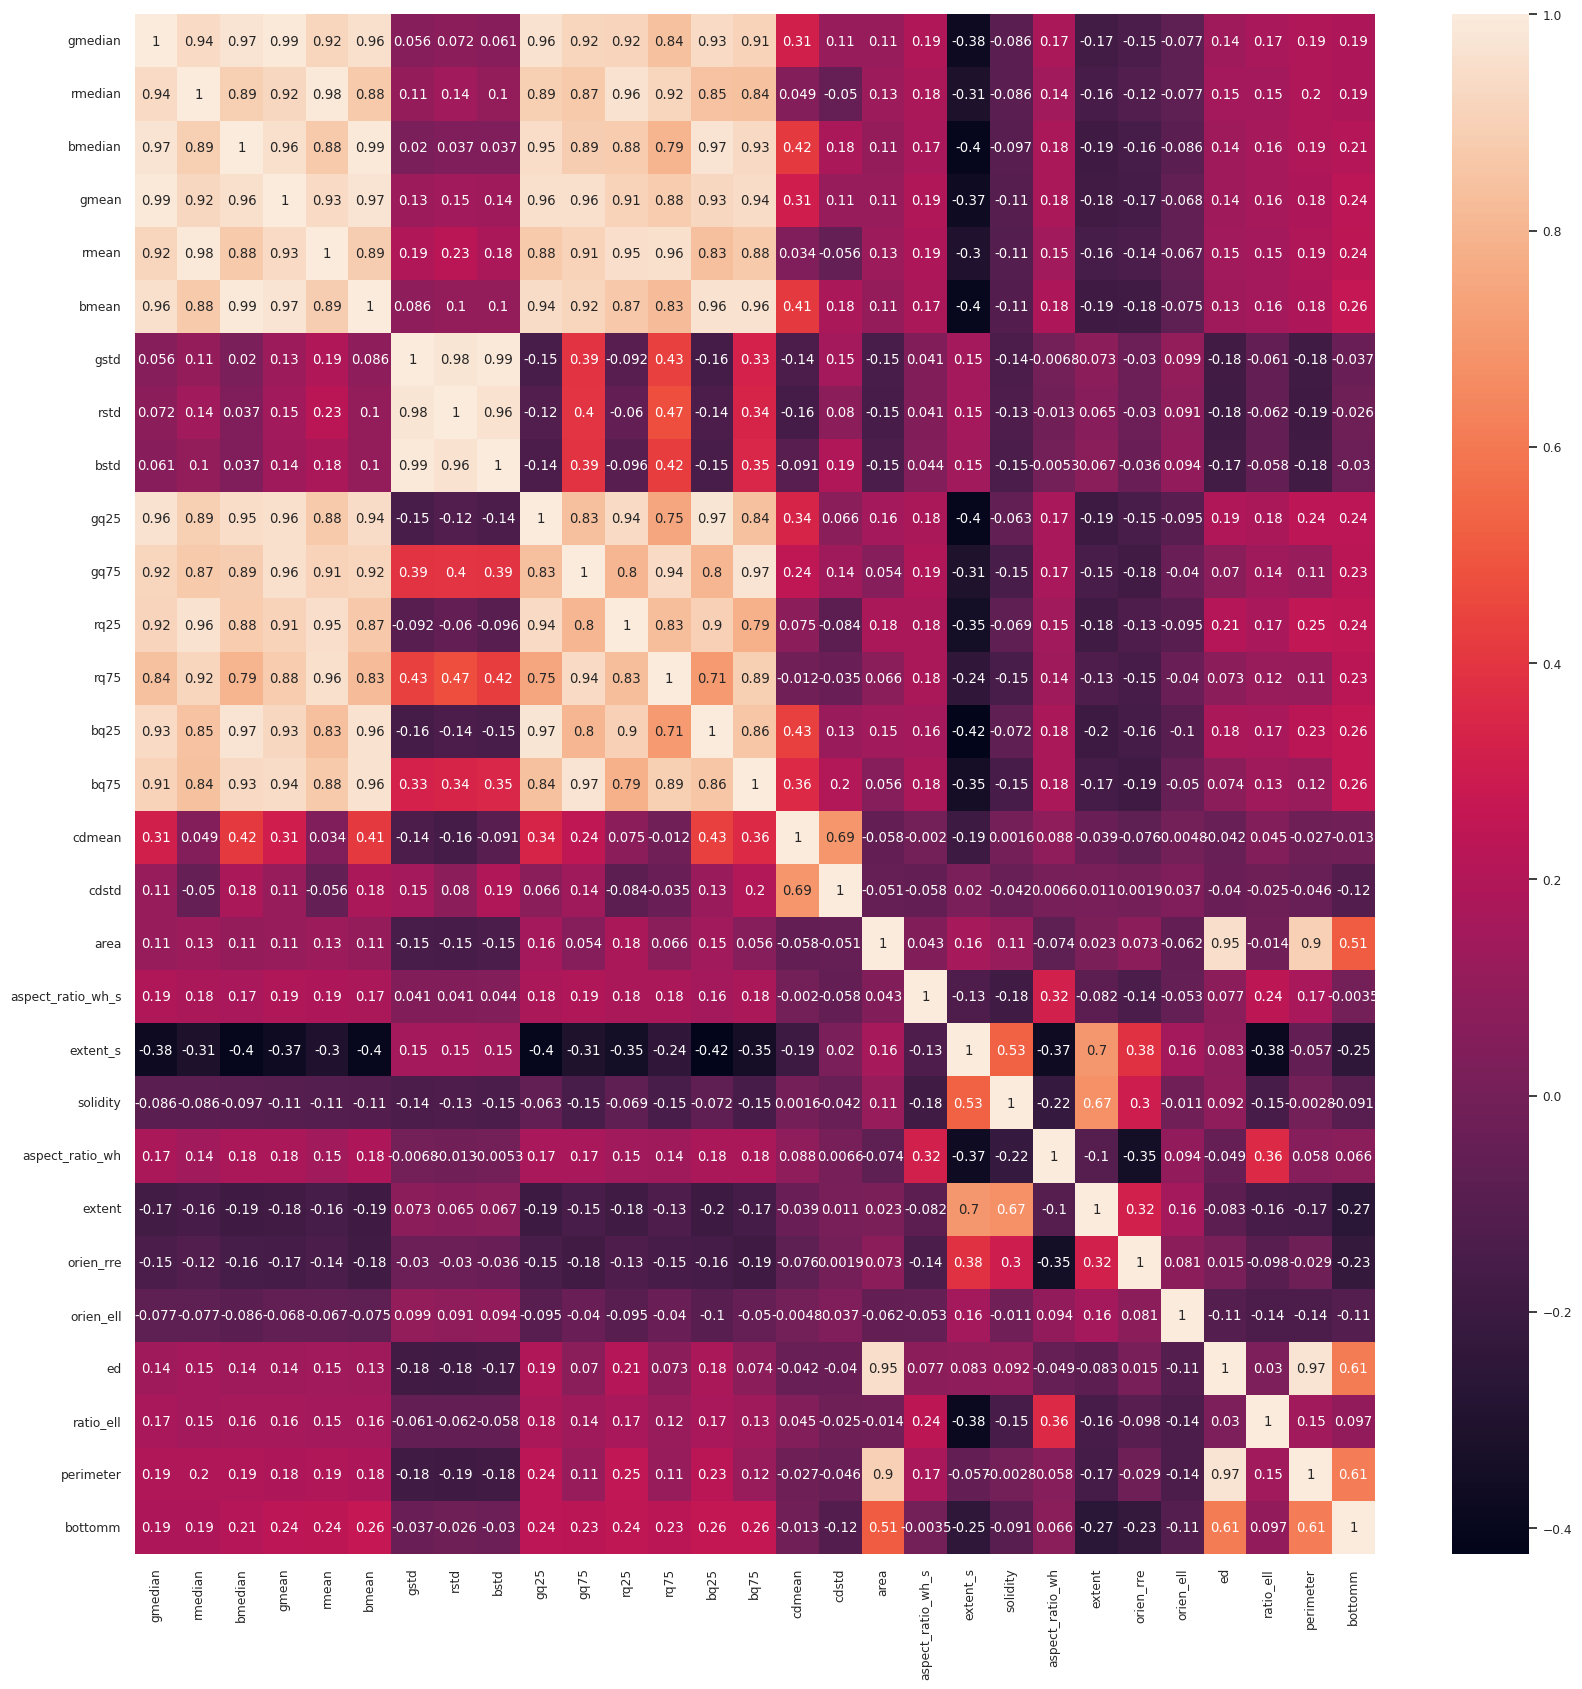

In [153]:
corr_matrix = dfc.corr()
plt.figure(figsize=(20,20))
sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix, annot = True)
# plt.savefig('fig06_corrmat_low_u.png')
plt.show()